In [1]:
import yass
from yass import read_config
from pathlib import Path
import numpy as np
from dstools import plot
import matplotlib.pyplot as plt

In [2]:
! ls ../../data/cat/spike-train/

spike_index.npy  spike_train_post_cluster_post_merge.npy
spike_train.npy  templates_post_cluster_post_merge.npy


In [3]:
spike_train = np.load('../../data/cat/spike-train/spike_train_post_cluster_post_merge.npy')
templates = np.load('../../data/cat/spike-train/templates_post_cluster_post_merge.npy')

In [4]:
yass.set_config("../config/gcloud/49/default.yaml", 'noisy')
CONFIG = read_config()

In [5]:
templates.shape

(228, 61, 49)

/home/Edu/dstools/src/dstools/plot/plot.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicer]


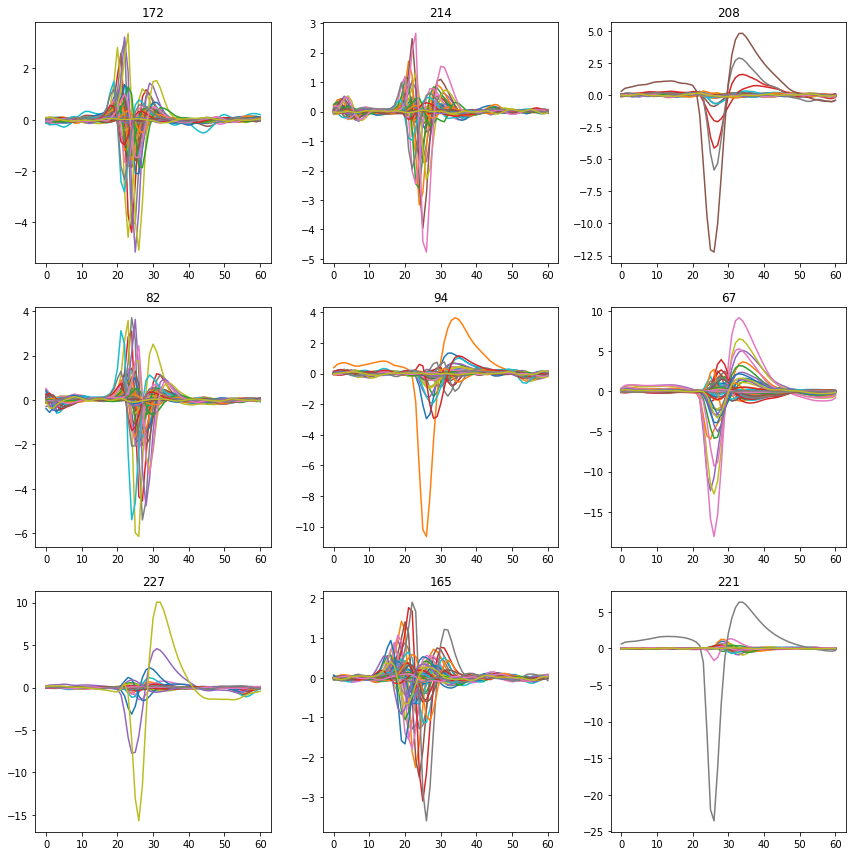

In [6]:
plot.grid_from_array(templates, axis=0, elements=9, auto_figsize=4)

In [7]:
spike_train

array([[    4173,        0],
       [    4914,        0],
       [    6824,        0],
       ...,
       [23824497,      227],
       [23824661,      227],
       [23904904,      227]])

In [8]:
template2mainchannel = {i: ch for i, ch in enumerate(templates.max(axis=1).argmax(axis=1))}

In [9]:
spike_index = spike_train.copy()

for i, row in enumerate(spike_train):
    spike_index[i, 1] = template2mainchannel[row[1]]

In [10]:
to_keep = spike_index[:, 0] <= int(6e6)

spike_index = spike_index[to_keep]
spike_train = spike_train[to_keep]

In [11]:
spike_index

array([[   4173,       0],
       [   4914,       0],
       [   6824,       0],
       ...,
       [5670731,      48],
       [5683084,      48],
       [5998440,      48]])

In [12]:
spike_index.shape

(410089, 2)

In [13]:
np.save('../../data/cat/spike-train/spike_index.npy', spike_index)
np.save('../../data/cat/spike-train/spike_train.npy', spike_train)

In [14]:
from yass.batch import RecordingsReader
from os import path
import lib_denoiser as lib
from yass.geometry import make_channel_index

ch_idx = make_channel_index(CONFIG.neigh_channels, CONFIG.geom)

path_to_data = path.expanduser('~/data')
path_to_experiment = path.join(path_to_data, 'retinal/sample_output')
path_to_standarized = path.join(path_to_experiment,
                                'preprocess', 'standarized.bin')

rec = RecordingsReader(path_to_standarized, loader='array').data

In [15]:
index = lib.SpikeIndex(spike_index, ch_idx, CONFIG.geom, CONFIG.neigh_channels)

In [16]:
spikes = index.read_waveforms_from_channel(rec, 0, waveform_length=31, random_shift=False, add_offset=False)

/home/Edu/dstools/src/dstools/plot/plot.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicer]


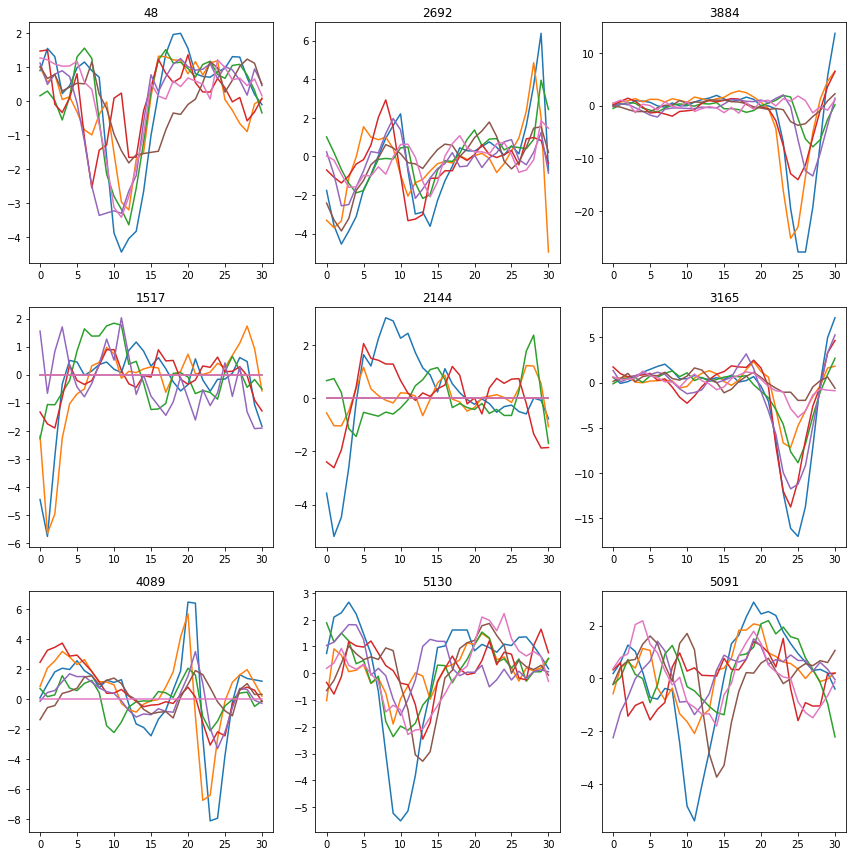

In [17]:
plot.grid_from_array(spikes, axis=0, elements=9, auto_figsize=4)

In [18]:
colors = ['black', 'red', 'blue', 'green', 'yellow', 'gray']

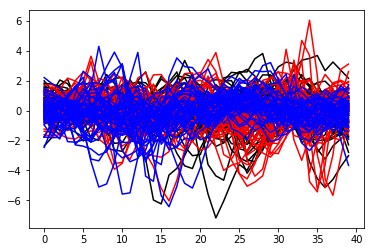

In [19]:
for i, (time, ch) in enumerate(index.arr[5410:5410+3]):
    _ = plt.plot(rec[time-20:time+20, :], color=colors[i])

In [20]:
time, ch = index.arr[4457]

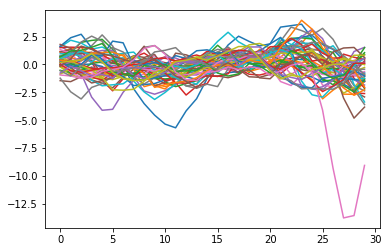

In [21]:
_ = plt.plot(rec[time-15:time+15, :])

In [22]:
len(spike_index), len(spike_train)

(410089, 410089)

In [23]:
spike_train[4457]

array([5332503,       1])

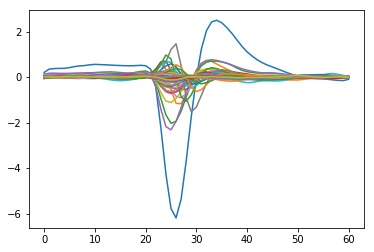

In [24]:
_ = plt.plot(templates[1])

In [25]:
spike_train[:, 1]

array([  0,   0,   0, ..., 227, 227, 227])

In [26]:
np.all(spike_index[:, 0] == spike_train[:, 0])

True

In [38]:
spike_index.shape

(410089, 2)

In [39]:
spike_index[spike_train[:, 1] == 1].shape

(1767, 2)

In [33]:
index_tmp = lib.SpikeIndex(spike_index[spike_train[:, 1] == 1], ch_idx, CONFIG.geom, CONFIG.neigh_channels)
wfs = index_tmp.read_waveforms_from_channel(rec, 0, waveform_length=51, random_shift=False, add_offset=False,
                                            only_neighbors=False)

In [34]:
wfs.shape

(1767, 51, 49)

/home/Edu/dstools/src/dstools/plot/plot.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicer]


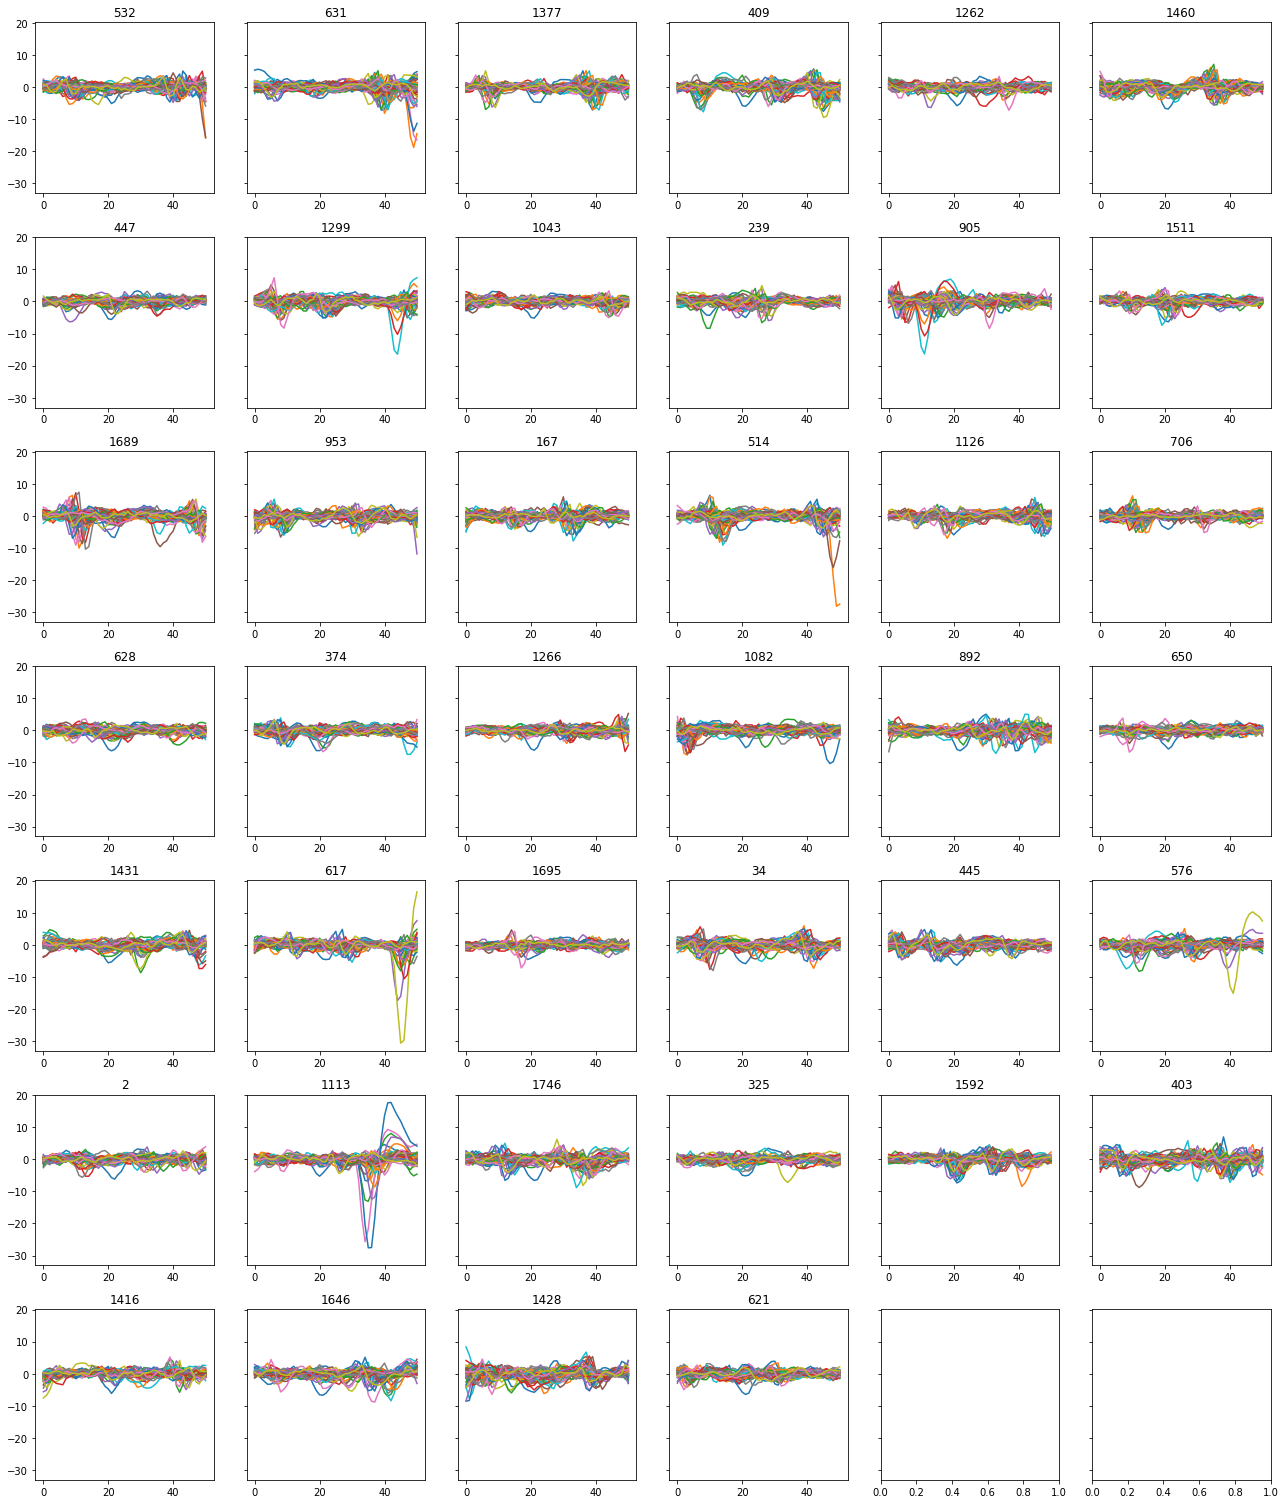

In [36]:
plot.grid_from_array(wfs, axis=0, elements=40, auto_figsize=3, sharey=True)

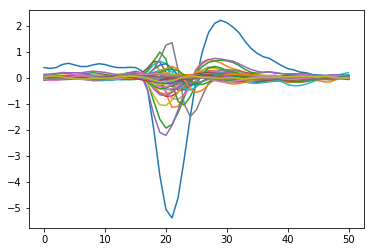

In [37]:
_ = plt.plot(wfs.mean(axis=0))